In [4]:
from beewalkvideotrack import BeeTrack

# Demo

In this demo we open the demo movie file, run the algorithm on it, and output some results.

In [5]:
#First, open the video file and store (low-res version) in memory
#bt = BeeTrack('demovideo.mp4',fromframe=40)
bt = BeeTrack('/home/mike/Documents/Research/beebehaviourdata/labelled/19N_e_vert-G18.mp4',fromframe=0)

Loading frames
................................................................................................................................................................................................................................................................................................................................................................

In [6]:
#Second, run the analysis, and compute various features.
bt.getpath()
bt.compute_features()

In [7]:
bt.walksegments

,start (frame),end (frame),start (s),end (s),filename,distance (pixels),distance (mm)
0,114,236,4.56,9.44,/home/mike/Documents/Research/beebehaviourdata...,1182.628193,None
1,247,250,9.88,10.00,/home/mike/Documents/Research/beebehaviourdata...,8.298167,None
2,265,270,10.60,10.80,/home/mike/Documents/Research/beebehaviourdata...,16.544028,None
3,287,315,11.48,12.60,/home/mike/Documents/Research/beebehaviourdata...,187.980291,None


In [ ]:
bt.walksegments.to_csv()

In [70]:
import numpy as np
mmperpixel = None
walk = bt.walk.copy()
walk[-1]=np.NaN #ensures the walk stops at the end
walkstarts = (walk[:-1]!=1) & (walk[1:]==1)
walkstarts = np.where(walkstarts)[0]
walkstops = (walk[:-1]==1) & (walk[1:]!=1)
walkstops = np.where(walkstops)[0]

walksegments = []
mmperpixel = 4
framerate = 25
for start,end in zip(walkstarts,walkstops):
    distwalked = np.sum(bt.speed[start:end])/framerate #in pixels
    if mmperpixel is None:
        mmdistwalked = None
    else:
        mmdistwalked = distwalked * mmperpixel #in mm
    walksegments.append([start,end,start/framerate,end/framerate,videofilename,distwalked,mmdistwalked])
    

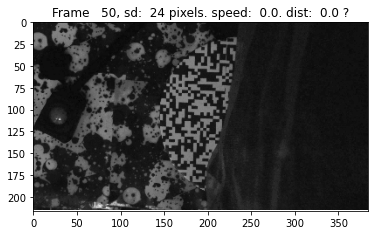

In [12]:
#Now just look at the outputs, e.g.:

bt.plotframe(50) #for example, look at frame 50

In [13]:
bt.totalwalkdist #total walk distance (pixels)

1480.3889606076648

t:   1%|          | 2/350 [00:00<00:21, 15.86it/s, now=None]

Moviepy - Building video demoresult.mp4.
Moviepy - Writing video demoresult.mp4



Moviepy - Done !
Moviepy - video ready demoresult.mp4


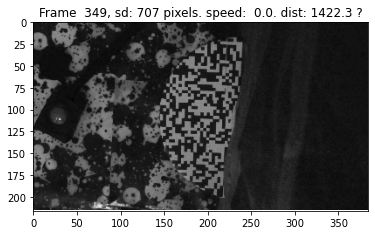

In [8]:
#this generates a new (low-res) mp4 to show the tracking behaviour
#which lets us check it's doing the right thing.
bt.makemovie('demoresult.mp4')

In [7]:
bt.grabhighres(100,1,10)

Loading frames
...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

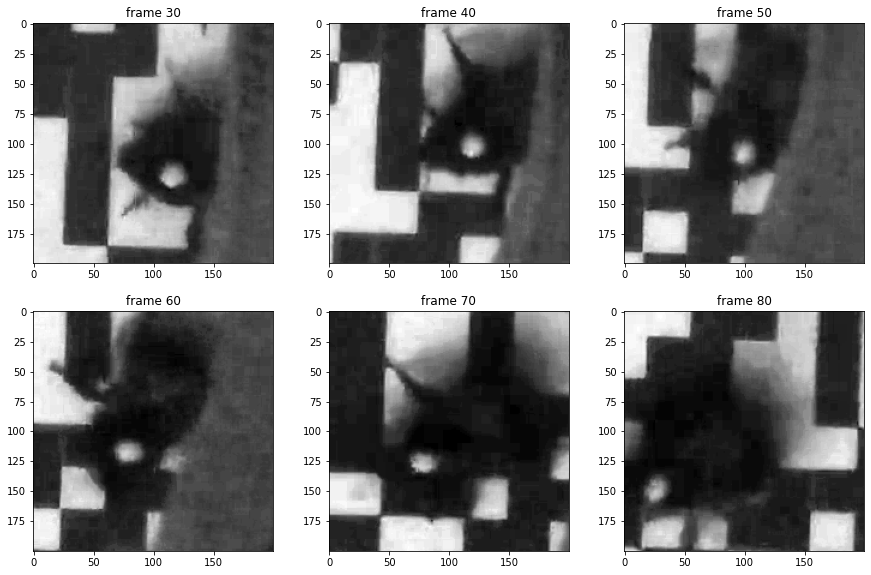

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[15,15])
figi=1
for i in range(30,90):
    if bt.highresframes[i] is not None:
        plt.subplot(3,3,figi)
        figi+=1
        plt.imshow(bt.highresframes[i],cmap='gray')
        plt.title("frame %d"  % i)
        if figi>9: break

# Batch processing

In [ ]:
#This will loop through all the images in a folder called 'data', and record how far the bee walks in each
#in a csv called 'summarywalkdist.csv'.
from glob import glob
for fn in glob('data/*.mp4'):
    newfn = fn.split('.')
    newfn = '.'.join([newfn[0]+'_track',newfn[1]])
    bt = BeeTrack(fn)
    bt.getpath()
    bt.compute_features()
    bt.makemovie(newfn)
    with open('summarywalkdist.csv', 'a') as file:
        file.write('%s,%0.1f\n' % (fn.split('/')[1],bt.totalwalkdist))